In [3]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import gsw
import matplotlib.cm as cm

This notebook compares two simulation of a plastic prticle sinking in the ocean using two integration schemes: simple Euler (RK1) and Runge-Kutta 4 (RK4)

The reason behind this comparisson is that implementing the Runge Kutta 4 scheme in parcels for solving the sinking velocity is not straight forward. It requires to do multiple call back of the TEOS10 equation to compute the surrounding density of the particle. This forces us to use a ScipyParticle class in Parcels, which is slower compared to a JITparticle. The RK1 scheme can be programmed in a JITparticle class, which makes it more conveninet and faster. 

So to recap, we want to know what is the error of using RK1 compared to RK4.


In [64]:
RK1 = xr.load_dataset('/storage/shared/oceanparcels/output_data/data_Claudio/RK1_1m_t25_rho1380.nc')
RK4 = xr.load_dataset('/storage/shared/oceanparcels/output_data/data_Claudio/RK4_1m_t25_rho1380.nc')

In [13]:
particle_sizes = RK1['alpha'][:,0]*1000 # in milimeters
n_particles = len(particle_sizes)

In [14]:
x_colors = np.linspace(0,1, n_particles)
colors = cm.get_cmap('viridis_r')(x_colors)

In [32]:
mean_diff = np.mean(RK1['z'][:,:15]/RK4['z'][:,:15], axis=1)
std_diff = np.std(RK1['z'][:,:15]/RK4['z'][:,:15], axis=1)

In [33]:
mean_diff_vs = np.mean(RK1['v_s']/RK4['v_s'], axis=1)
std_diff_vs = np.std(RK1['v_s']/RK4['v_s'], axis=1)

In [34]:
ratios = mean_diff - 1

In [35]:
idx_big = np.where(ratios > 1e-3)[0]
idx_small = np.where(ratios <= 1e-3)[0]


In [40]:
plt.rcParams.update({'font.size':13})

(0.0, 0.1)

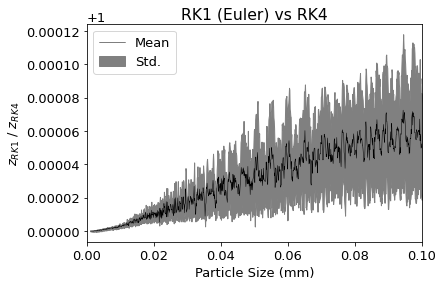

In [58]:
#plt.errorbar(particle_sizes, mean_diff, yerr=std_diff,label='Mean', fmt = 'o', ms=1, color = 'black', 
#             ecolor = 'black', elinewidth = 0.11, capsize=1)
# 
plt.fill_between(particle_sizes, mean_diff + std_diff, mean_diff - std_diff,
                color='gray', label='Std.')
plt.plot(particle_sizes, mean_diff, color='k', lw=0.5, label='Mean')
plt.legend(loc='upper left')
plt.ylabel('$z_{RK1}$ / $z_{RK4}$')
plt.xlabel('Particle Size (mm)')
plt.title('RK1 (Euler) vs RK4')
plt.xlim(0,0.1)
# plt.xlim(0.055,0.08)

Investigate the 1's at the for particles larger than 0.06mm

In [63]:
RK1_adv = xr.load_dataset('/storage/shared/oceanparcels/output_data/data_Claudio/RK1_1m_t25_rho1380_advec.nc')

----------

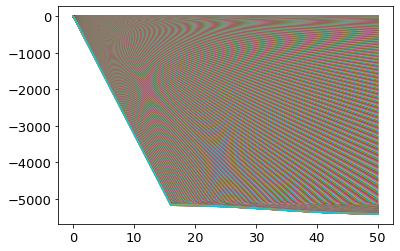

In [69]:
for i in range(1000):
    plt.plot(-RK1_adv['z'][i,:])

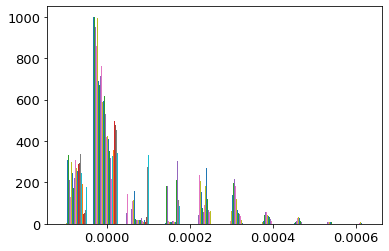

In [75]:
plt.hist(RK1_adv['w']);

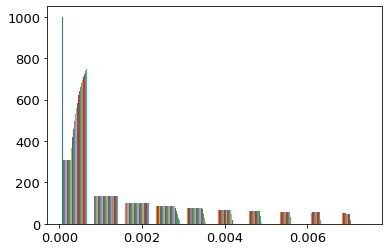

In [77]:
plt.hist(RK1_adv['v_s']);

In [70]:
RK1_adv['v_s']

<xarray.DataArray 'v_s' (traj: 1000, obs: 51)>
array([[0.0000000e+00, 7.5423918e-07, 7.5419723e-07, ..., 7.5508103e-07,
        7.5508416e-07, 7.5509257e-07],
       [0.0000000e+00, 9.1112247e-07, 9.1108450e-07, ..., 9.1215253e-07,
        9.1215634e-07, 9.1216646e-07],
       [0.0000000e+00, 1.0828303e-06, 1.0827852e-06, ..., 1.0840549e-06,
        1.0840595e-06, 1.0840499e-06],
       ...,
       [0.0000000e+00, 7.4848165e-03, 7.4691749e-03, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 7.4996916e-03, 7.4840188e-03, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 7.5145815e-03, 7.4988776e-03, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)
Dimensions without coordinates: traj, obs
Attributes:
    long_name:      
    standard_name:  v_s
    units:          unknown